In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas

#import preprocesamiento #los metodos de preprocesamiento.py reciben datos en la forma: data.values donde data
                        #es producto de leer csv con pandas.read_csv
import torch as tr

class BOW():
    def __init__(self,dataset,strip_accents,stoplist,weighting,ngram = None):
        #autocorregir -> lematizar -> borrar signos, carac especiales, stopwords, pasar a minuscula
        #x_text_auto = preprocesamiento.Autocorrector(dataset.values)
        #x_text_lem = preprocesamiento.Lematizar(dataset)
        #x_text_lem = x_text_lem[:,1]
        #x_text_lem = dataset[:,1] esto anda
        if weighting:
            if ngram: 
                vectorizer = TfidfVectorizer(strip_accents=strip_accents,stop_words=stoplist,ngram_range=ngram) 
            else:
                vectorizer = TfidfVectorizer(strip_accents=strip_accents,stop_words=stoplist)   
        else:
            if ngram:
                vectorizer = CountVectorizer(strip_accents=strip_accents,stop_words=stoplist,ngram_range=ngram)     
            else: 
                vectorizer = CountVectorizer(strip_accents=strip_accents,stop_words=stoplist)
        #X = vectorizer.fit_transform(x_text_lem)  
        X = vectorizer.fit_transform(dataset)
        self.vectorizer = vectorizer
        self.X = X

    def get_vocab(self):
        return(self.vectorizer.get_feature_names())

    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import math
from sklearn.model_selection import RandomizedSearchCV,train_test_split
import torch
from sklearn.metrics import balanced_accuracy_score
from mpl_toolkits import mplot3d
import scipy.interpolate as interp
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import GradientBoostingClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
correctedData = pn.read_csv("preprocessedQuestions_lem_completadas.csv",delimiter=',',header=None) #comentar esta linea en caso de descomentar la anterior
cantidad_preg = correctedData.shape[0]
correctedData = correctedData.values
stoplist = stopwords.words('spanish')
bow_unigram = BOW(correctedData[:,1],'ascii',stoplist,weighting = True)

Y = np.zeros((cantidad_preg),dtype=np.int64)
for i in range(cantidad_preg):
    Y[i] = correctedData[i,0]

Y = torch.from_numpy(Y)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'teniamos', 'tenian', 'tenias', 'tuvier

In [0]:
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1800, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 110, num = 15)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10,20,40,50]
#min_split_gain = np.random.normal(1,0.5,20)
#min_split_gain = list(map(lambda x: x,min_split_gain))
#min_split_gain = list(map(lambda x: -1*x if x<0 else x,min_split_gain))
min_split_gain = [0.9,1.1,1.3,1.4]
#min_split_gain = [1,2]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4,6,12,20]
min_child_samples = [1,2,4,6,12,20]
num_leaves = [2,10,30,40,50,70,100]
parameters = {
    'n_estimators': n_estimators,
    #'max_features': max_features,
    'min_split_gain' : min_split_gain,
    'max_depth': max_depth,
    #'min_samples_split': min_samples_split,
    #'min_samples_leaf': min_samples_leaf,
    'min_child_samples': min_child_samples,
    'num_leaves': num_leaves,
    'random_state': [12]
}
pprint(parameters)

{'max_depth': [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110],
 'min_child_samples': [1, 2, 4, 6, 12, 20],
 'min_split_gain': [0.9, 1.1, 1.3, 1.4],
 'n_estimators': [200, 377, 555, 733, 911, 1088, 1266, 1444, 1622, 1800],
 'num_leaves': [2, 10, 30, 40, 50, 70, 100],
 'random_state': [12]}


In [0]:
from lightgbm import LGBMClassifier
net = LGBMClassifier()
#net = GradientBoostingClassifier()

candidatos = 20

gs = RandomizedSearchCV(net,parameters,verbose=2,cv=10,scoring='balanced_accuracy',n_iter=candidatos,n_jobs=-1)
Y_numpy = Y.numpy()
X_train,X_test,y_train,y_test = train_test_split(bow_unigram.X,Y_numpy,shuffle=True,stratify=Y_numpy,test_size=0.1,random_state=12)
print(type(X_train))
print(type(y_train))
X_train_numpy = X_train.toarray()
print(type(X_train_numpy))
gs.fit(X_train_numpy,y_train)

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 34.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            re...
                   param_distributions={'max_depth': [40, 45, 50, 55, 60, 65,
                                                

In [0]:
# Number of trees in random forest
n_estimators = []
# Maximum number of levels in tree
max_depth= []
# Minimum number of samples required to split a node
min_split_gain = []
# Minimum number of samples required at each leaf node
min_child_samples = []
num_leaves = []
score=[]
std=[]
y_test_tensor = torch.LongTensor(y_test)
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            score.append(results['mean_test_score'][candidate])
            std.append(results['std_test_score'][candidate])
            n_estimators.append(results['params'][candidate]['n_estimators'])
            max_depth.append(results['params'][candidate]['max_depth'])
            min_split_gain.append(results['params'][candidate]['min_split_gain'])
            min_child_samples.append(results['params'][candidate]['min_child_samples'])
            num_leaves.append(results['params'][candidate]['num_leaves'])

report(gs.cv_results_,candidatos)  

Model with rank: 1
Mean validation score: 0.644 (std: 0.040)
Parameters: {'random_state': 12, 'num_leaves': 2, 'n_estimators': 1266, 'min_split_gain': 0.9, 'min_child_samples': 1, 'max_depth': 50}

Model with rank: 1
Mean validation score: 0.644 (std: 0.040)
Parameters: {'random_state': 12, 'num_leaves': 2, 'n_estimators': 1444, 'min_split_gain': 0.9, 'min_child_samples': 1, 'max_depth': 65}

Model with rank: 3
Mean validation score: 0.621 (std: 0.025)
Parameters: {'random_state': 12, 'num_leaves': 2, 'n_estimators': 1800, 'min_split_gain': 1.1, 'min_child_samples': 4, 'max_depth': 110}

Model with rank: 4
Mean validation score: 0.618 (std: 0.025)
Parameters: {'random_state': 12, 'num_leaves': 2, 'n_estimators': 1088, 'min_split_gain': 1.3, 'min_child_samples': 4, 'max_depth': 105}

Model with rank: 5
Mean validation score: 0.608 (std: 0.027)
Parameters: {'random_state': 12, 'num_leaves': 30, 'n_estimators': 377, 'min_split_gain': 0.9, 'min_child_samples': 2, 'max_depth': 60}

Model wi

In [0]:
print("score: ",score)
print("std: ",std)
print("n_estimators: ",n_estimators)
print("max_depth: ",max_depth)
print("min_split_gain: ",min_split_gain)
print("min_child_samples: ",min_child_samples)
print("num_leaves: ",num_leaves)

score:  [0.6436938910028871, 0.6436938910028871, 0.6213012504444254, 0.6180606116825351, 0.6080727174284066, 0.5900766653644512, 0.5791661038368272, 0.5392153442080466, 0.5371258442681129, 0.5349802014678603, 0.5340979131483963, 0.22118416315470188, 0.158851879440634, 0.158851879440634, 0.1548215040046394, 0.09127815527078702, 0.09127815527078702, 0.07288391861097519, 0.06764997476840837, 0.06626181685769252]
std:  [0.0404551919997268, 0.0404551919997268, 0.02503491689221211, 0.02522220998413365, 0.02740288434280088, 0.027168208288229568, 0.044689839615981795, 0.03632221737893926, 0.03566892681555656, 0.0353746705857772, 0.036911151564487266, 0.10245676639440739, 0.1070567272214399, 0.1070567272214399, 0.15556882168632447, 0.088479389032503, 0.088479389032503, 0.011882487863586626, 0.11846424318731288, 0.013840891839415299]
n_estimators:  [1266, 1444, 1800, 1088, 377, 1444, 200, 200, 1444, 911, 1800, 1444, 1800, 1266, 1088, 1266, 911, 200, 1444, 1088]
max_depth:  [50, 65, 110, 105, 60,

In [0]:
print(type(X_test))
X_test_numpy = X_test.toarray()
probs = gs.best_estimator_.predict_proba(X_test_numpy)
acc = balanced_accuracy_score(y_test_tensor,np.argmax(probs,axis=1))
print("tasa de acierto obtenida: ",acc)

<class 'scipy.sparse.csr.csr_matrix'>
tasa de acierto obtenida:  0.6320754716981132


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Z contains NaN values. This may result in rendering artifacts.


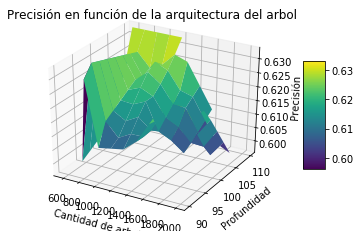

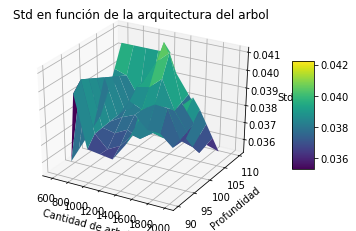

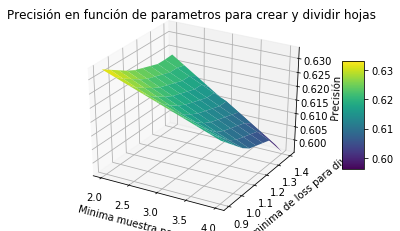

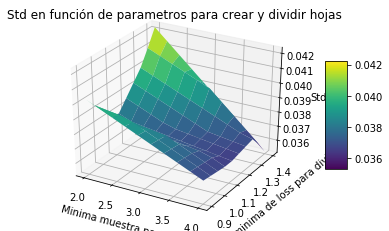

In [0]:
ejex = n_estimators
ejey = max_depth
#print(ejez)
#print(len(ejez))
#ejez = [0.5,0.3,0.4,0.33,0.6,0.45,0.75,0.8,0.2,0.47,0.56,0.66,0.9,0.87,0.67,0.43]
ejez = score
plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='linear')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Cantidad de arboles')
ax.set_ylabel('Profundidad')
ax.set_zlabel('Precisión')
ax.set_title('Precisión en función de la arquitectura del arbol')
surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("prueba8_estimators_depth_Precision.svg")
####################################################################################################################

ejex = n_estimators
ejey = max_depth
#print(ejez)
#print(len(ejez))
#ejez = [0.5,0.3,0.4,0.33,0.6,0.45,0.75,0.8,0.2,0.47,0.56,0.66,0.9,0.87,0.67,0.43]
ejez = std
plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='linear')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Cantidad de arboles')
ax.set_ylabel('Profundidad')
ax.set_zlabel('Std')
ax.set_title('Std en función de la arquitectura del arbol')
surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("prueba8_estimators_depth_std.svg")
##############################################################################################################
ejex = min_child_samples
ejey = min_split_gain
#print(ejez)
#print(len(ejez))
#ejez = [0.5,0.3,0.4,0.33,0.6,0.45,0.75,0.8,0.2,0.47,0.56,0.66,0.9,0.87,0.67,0.43]
ejez = score
plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='linear')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Minima muestra para hoja')
ax.set_ylabel('Ganancia minima de loss para dividir')
ax.set_zlabel('Precisión')
ax.set_title('Precisión en función de parametros para crear y dividir hojas')
surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("prueba8_minsampleasleaf_minsamplessplit_Precision.svg")
###############################################################################################################
ejex = min_child_samples
ejey = min_split_gain
#print(ejez)
#print(len(ejez))
#ejez = [0.5,0.3,0.4,0.33,0.6,0.45,0.75,0.8,0.2,0.47,0.56,0.66,0.9,0.87,0.67,0.43]
ejez = std
plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='linear')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Minima muestra para hoja')
ax.set_ylabel('Ganancia minima de loss para dividir')
ax.set_zlabel('Std')
ax.set_title('Std en función de parametros para crear y dividir hojas')
surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("prueba8_minsampleasleaf_minsamplessplit_std.svg")
plt.show()
plt.show()